In [9]:
from ROOT import TFile, TCanvas, TH1D, TH2D, TF1, gPad , gStyle, TGraph, TGraphErrors, gROOT, TColor
import os
print(os.getcwd())
os.chdir(os.path.expanduser("~"))
if not os.path.isdir(".alteredRoot"):
    os.mkdir(".alteredRoot")
print(sorted(os.listdir()))

/afs/desy.de/user/s/school32
['.OldFiles', '.alteredRoot', '.amd64_linux26', '.amd64_rhel30', '.amd64_rhel40', '.amd64_rhel50', '.bash_history', '.cache', '.config', '.globus', '.i386_linux24', '.i386_linux26', '.i586_linux24', '.i586_rhel30', '.i586_rhel40', '.i586_rhel50', '.ipynb_checkpoints', '.ipython', '.jupyter', '.jupyterhub.condor.err', '.jupyterhub.condor.out', '.kde', '.kde2', '.local', '.login', '.netscape', '.pgp', '.profile', '.python_history', '.ssh', '.sun4x_510', '.sun4x_58', '.zprofile', 'DESYChain', 'Desktop', 'Documents', 'Jupyter Analyses', 'KDesktop', 'Mail', 'bin', 'github folder', 'mail', 'ns_imap', 'nsmail', 'private', 'public', 'school', 'ssl', 'www']


******************************************************************************
*Tree    :RAWdata   : BL4S RAW data tree                                     *
*Entries :   102441 : Total =        84408980 bytes  File  Size =   19750123 *
*        :          : Tree compression factor =   4.28                       *
******************************************************************************
*Br    0 :QDC0_ch0  : QDC0_ch0/i                                             *
*Entries :   102441 : Total  Size=     411355 bytes  File Size  =     217618 *
*Baskets :       13 : Basket Size=      32000 bytes  Compression=   1.89     *
*............................................................................*
*Br    1 :QDC0_ch1  : QDC0_ch1/i                                             *
*Entries :   102441 : Total  Size=     411355 bytes  File Size  =     153067 *
*Baskets :       13 : Basket Size=      32000 bytes  Compression=   2.68     *
*...................................................

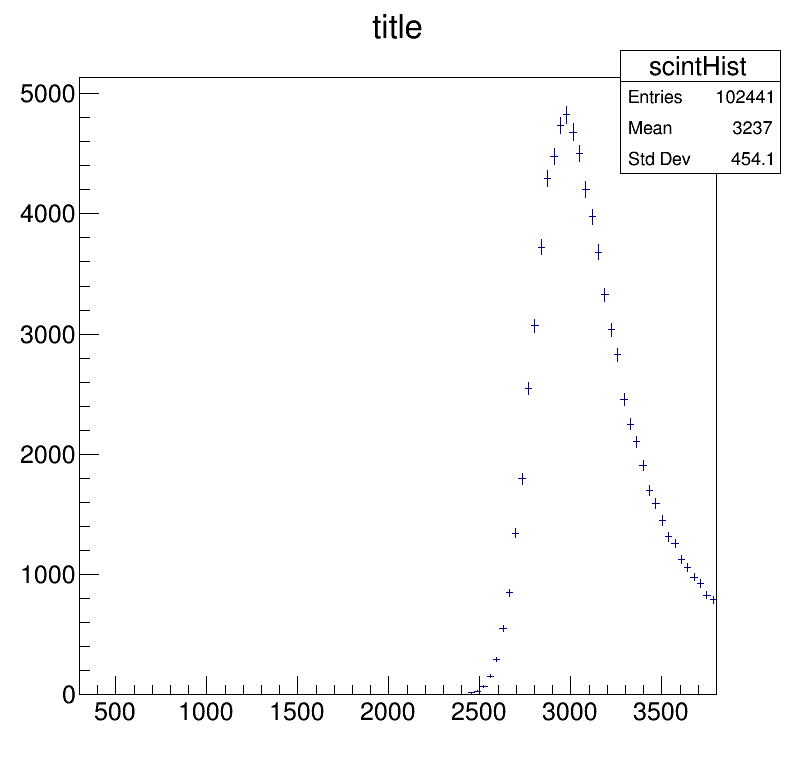

In [6]:
from ROOT import TFile, TCanvas, TH1D, TH2D, TF1, gPad , gStyle, TGraph, TGraphErrors, gROOT, TColor

importFile = TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")
RAWdata.Print()
RAWdata.SetAlias("scint", "QDC0_ch0")
scintHist=TH1D("scintHist", "title", 100, 300, 3800)
c2 = TCanvas("name", "title", 800, 800)
RAWdata.Draw("scint>>scintHist")
scintHist.Draw()
c2.Draw()

In [13]:
from rootpy.tree import Tree
from rootpy.io import root_open

help(root_open)

ERROR:ROOT.TSystem.ExpandFileName] input: $HOME/.root.mimes, output: $HOME/.root.mimes


Help on function root_open in module rootpy.io.file:

root_open(filename, mode='')
    Open a ROOT file via ROOT's static ROOT.TFile.Open [1] function and return
    an asrootpy'd File.
    
    Parameters
    ----------
    
    filename : string
        The absolute or relative path to the ROOT file.
    
    mode : string, optional (default='')
        Mode indicating how the file is to be opened.  This can be either one
        of the options supported by ROOT.TFile.Open [2], or one of `a`, `a+`,
        `r`, `r+`, `w` or `w+`, with meanings as for the built-in `open()`
        function [3].
    
    Returns
    -------
    
    root_file : File
        an instance of rootpy's File subclass of ROOT's TFile.
    
    References
    ----------
    
    .. [1] http://root.cern.ch/root/html/TFile.html#TFile:Open
    .. [2] http://root.cern.ch/root/html/TFile.html#TFile:TFile@2
    .. [3] https://docs.python.org/2/library/functions.html#open



In [4]:
from ROOT import TFile, TTree
from ROOT import gROOT, AddressOf
import os
os.chdir(os.path.expanduser("~"))
gROOT.ProcessLine(
"struct MyStruct {\
   Int_t     fMyInt1;\
   Int_t     fMyInt2;\
   Int_t     fMyInt3;\
   Char_t    fMyCode[4];\
};" );

from ROOT import MyStruct
mystruct = MyStruct()

f = TFile( 'mytree.root', 'RECREATE' )
tree = TTree( 'T', 'Just A Tree' )
tree.Branch( 'myints', mystruct, 'MyInt1/I:MyInt2:MyInt3' )
tree.Branch( 'mycode', AddressOf( mystruct, 'fMyCode' ), 'MyCode/C' )

for i in range(10):
   mystruct.fMyInt1   = i
   mystruct.fMyInt2   = i*i
   mystruct.fMyInt3   = i*i*i
   mystruct.fMyCode   = "%03d" % i      # note string assignment

   tree.Fill()

f.Write()
f.Close()

In [2]:
tree.Print()

******************************************************************************
*Tree    :T         : Just A Tree                                            *
*Entries :       10 : Total =            1971 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :myints    : MyInt1/I:MyInt2:MyInt3                                 *
*Entries :       10 : Total  Size=        931 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :mycode    : MyCode/C                                               *
*Entries :       10 : Total  Size=        729 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

******************************************************************************
*Tree    :T         : Just A Tree                                            *
*Entries :   102441 : Total =          411656 bytes  File  Size =     203320 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :mycode    : MyCode/I                                               *
*Entries :   102441 : Total  Size=     411357 bytes  File Size  =     203320 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=   1.89     *
*............................................................................*


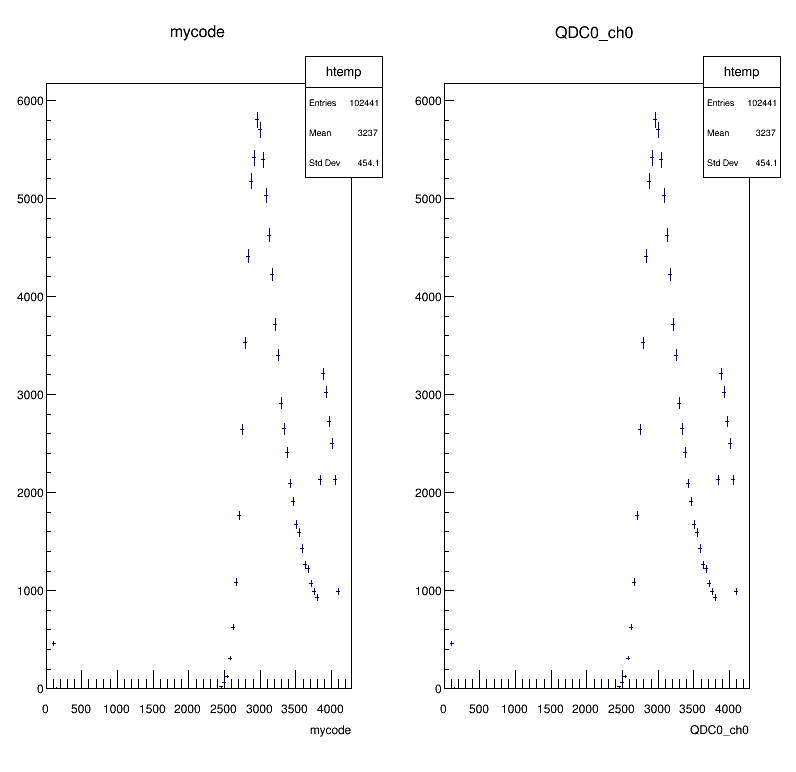

In [7]:
from ROOT import TFile, TTree, TH1D, TCanvas
from array import array
import os

os.chdir(os.path.expanduser("~"))
f = TFile( 'alteredRoot/mytree.root', 'RECREATE' )
tree = TTree( 'T', 'Just A Tree' )
n = array( 'i', [ 0 ] )
tree.Branch( 'mycode', n, 'MyCode/I' )

for event in RAWdata:
    n[0] = getattr(event, "QDC0_ch0")
    tree.Fill()

tree.Print()

scintHist=TH1D("scintHist", "title", 100, 300, 3800)
qHist=TH1D("qHist", "title", 100, 300, 3800)
c2 = TCanvas("name", "title", 800, 800)
c2.Divide(2, 1)
c2.cd(1)
tree.Draw("mycode")
c2.cd(2)
RAWdata.Draw("QDC0_ch0")
c2.Draw()

f.Write()
f.Close()

In [37]:
import sys
sys.path.append('/afs/desy.de/user/s/school32/DESYChain/Sam') #adding to the Python path, because we've cd'ed
import handy_utilities as hu

In [41]:
print(hu.comments)

 Unfortunately, ROOT doesn't support renaming branches within a TTree
One alternative is setting aliases. This can be helpful, but faces limitations. 
For example, to directly use a branch we can't say TTree.GetBranch("alias"); instead we do TTree.GetBranch(TTree.GetAlias("alias")). Also, it doesn't show in TTree.Print()
However, in most cases it is helpful, e.g. print(getattr(event, "alias")) or TTree.Draw("alias>>TH1D") works

If you really want to get a fully reformated TTree, call renameBranches_new(tree).



Warning in <TCanvas::Constructor>: Deleting canvas with same name: name


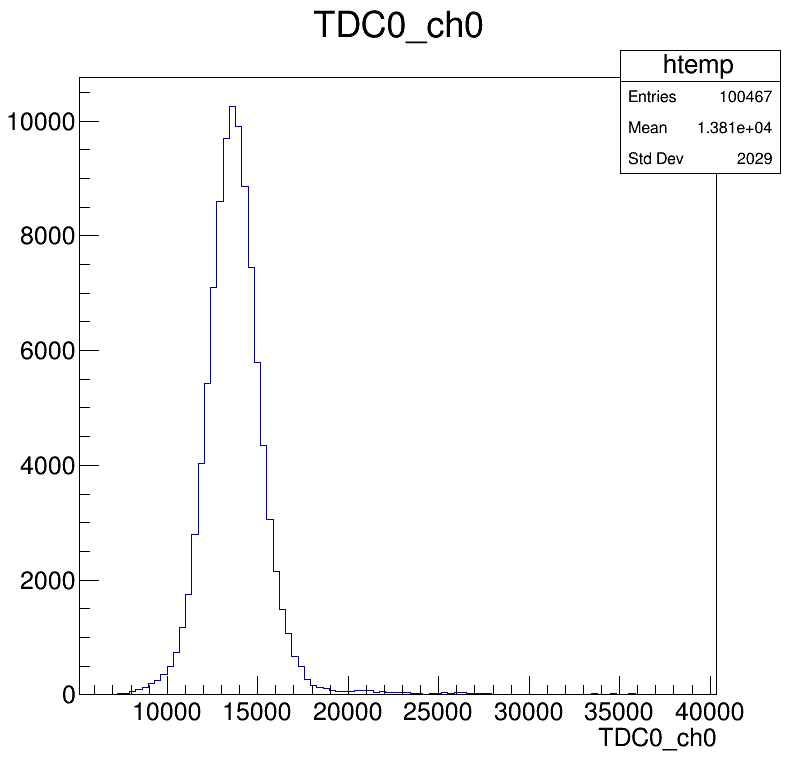

In [42]:
c2 = TCanvas("name", "title", 800, 800)
RAWdata.Draw("TDC0_ch0")
c2.Draw()

In [35]:
import ROOT
counter = 0
for event in RAWdata:
    try:
        print(event.TDC0_ch0[0], len(event.TDC0_ch0), list(event.TDC0_ch0), type(event.TDC0_ch0), type(event.QDC0_ch0))
    except:
        print(event.TDC0_ch0)
        pass
    counter +=1
    if counter>5:
        break

13400 2 [13400, 27200] <class 'ROOT.PyUIntBuffer'> <class 'int'>
<UInt_t buffer, size 0>
12996 1 [12996] <class 'ROOT.PyUIntBuffer'> <class 'int'>
12886 1 [12886] <class 'ROOT.PyUIntBuffer'> <class 'int'>
<UInt_t buffer, size 0>
15713 1 [15713] <class 'ROOT.PyUIntBuffer'> <class 'int'>


In [1]:
import ROOT
t = ROOT.TBuffer.WriteObject("<UInt_t buffer, size 0>")

Welcome to JupyROOT 6.20/04


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Instantiating a function template with parentheses ( f(type1, ..., typeN) ) is deprecated and will not be supported in a future version of ROOT. Instead, use square brackets: f[type1, ..., typeN]
  


<UInt_t buffer, size 2> array('i', [13400, 27200, 0])
<UInt_t buffer, size 0> array('i', [13400, 27200, 0])
<UInt_t buffer, size 1> array('i', [12996, 27200, 0])
<UInt_t buffer, size 1> array('i', [12886, 27200, 0])
<UInt_t buffer, size 0> array('i', [12886, 27200, 0])
<UInt_t buffer, size 1> array('i', [15713, 27200, 0])
<UInt_t buffer, size 1> array('i', [14826, 27200, 0])
<UInt_t buffer, size 1> array('i', [12568, 27200, 0])


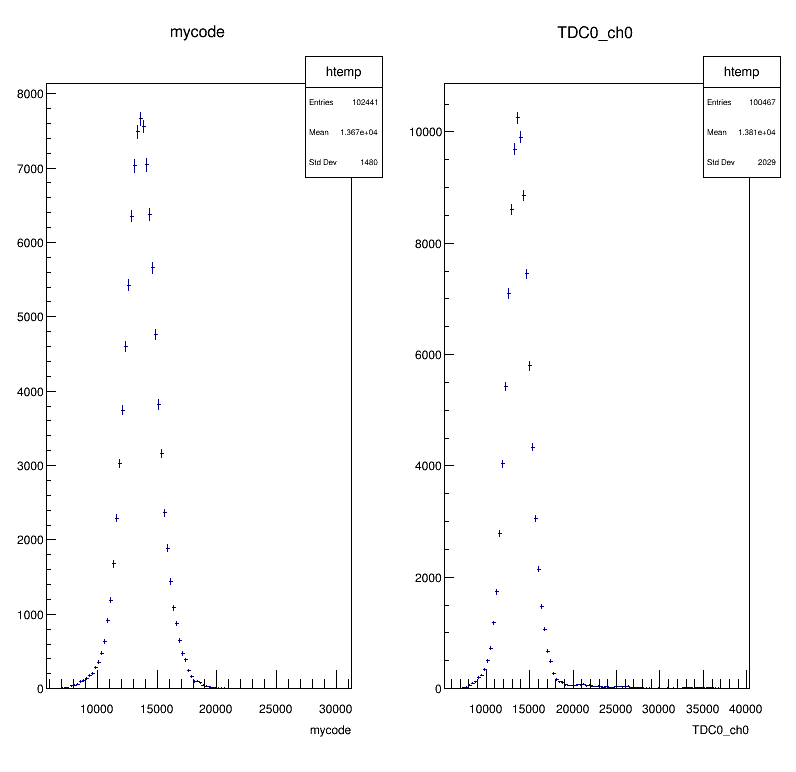

In [19]:
os.chdir(os.path.expanduser("~"))
f = TFile( 'alteredRoot/mytree.root', 'RECREATE' )
tree = TTree( 'T', 'Just A Tree' )
#https://root.cern.ch/root/html/tutorials/tree/tree3.C.html
n = array('i', [0]*3)
tree.Branch( 'mycode', n, 'MyCode/I' )

counter = 1
for event in RAWdata:
    data = getattr(event, "TDC0_ch0")
    for index in range(len(data)):
        n[index] = data[index]
    counter += 1
    if counter < 10:
        print(data, n)
    tree.Fill()
    '''for i in range(len(data)):
        n[i] = data[i]
    del n[len(data):]
    counter += 1
    if counter< 10:
        print(list(data))
        print(n, "\n")
        tree.Print()
    tree.Fill()
    del n[:]
    for i in range(100):
        n.append(0)'''
    
#tree.Print()

scintHist=TH1D("scintHist", "title", 100, 300, 3800)
qHist=TH1D("qHist", "title", 100, 300, 3800)
c2 = TCanvas("name", "title", 800, 800)
c2.Divide(2, 1)
c2.cd(1)
tree.Draw("mycode")
c2.cd(2)
RAWdata.Draw("TDC0_ch0")
c2.Draw()

f.Write()
f.Close()

In [ ]:
print('hi')

In [36]:
import ROOT
q = ROOT.PyUIntBuffer()

AttributeError: PyUIntBuffer

In [16]:
from ROOT import TFile, TTree
from ROOT import gROOT, AddressOf

gROOT.ProcessLine(
"struct MyStruct {\
   Int_t     fMyInt1[5];\
   Int_t     fMyInt2;\
   Int_t     fMyInt3;\
   Char_t    fMyCode[4];\
};" );

from ROOT import MyStruct
mystruct = MyStruct()

f = TFile( 'mytree.root', 'RECREATE' )
tree = TTree( 'T', 'Just A Tree' )
tree.Branch( 'myints', mystruct, 'MyInt1/I:MyInt2:MyInt3' )
tree.Branch( 'mycode', AddressOf( mystruct, 'fMyCode' ), 'MyCode/C' )

for i in range(10):
    mystruct.fMyInt1   = i
    mystruct.fMyInt2   = i*i
    mystruct.fMyInt3   = i*i*i
    mystruct.fMyCode   = "%03d" % i      # note string assignment

    tree.Fill()
tree.Print()
for event in Tree:
    print(event.myints)
f.Write()
f.Close()

TypeError: 'TTree_meta' object is not iterable

******************************************************************************
*Tree    :T         : Just A Tree                                            *
*Entries :       10 : Total =            1971 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :myints    : MyInt1/I:MyInt2:MyInt3                                 *
*Entries :       10 : Total  Size=        931 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :mycode    : MyCode/C                                               *
*Entries :       10 : Total  Size=        729 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................

In [2]:
from rootpy.tree import FloatArrayCol
help(FloatArrayCol)

Welcome to JupyROOT 6.20/04


ERROR:ROOT.TSystem.ExpandFileName] input: $HOME/.root.mimes, output: $HOME/.root.mimes


Help on class FloatArrayCol in module rootpy.tree.treetypes:

class FloatArrayCol(Column)
 |  Method resolution order:
 |      FloatArrayCol
 |      Column
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  type = <class 'rootpy.tree.treetypes.FloatArray'>
 |      This is an array of floats
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Column:
 |  
 |  __call__(self)
 |      Call self as a function.
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Column:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [5]:
print(__doc__)

from rootpy.tree import Tree, TreeModel, IntCol, FloatArrayCol
from rootpy.io import root_open
import os

class Event(TreeModel):
    num_vals = IntCol()
    vals = FloatArrayCol(10, length_name='num_vals')
os.chdir(os.path.expanduser("~"))

rfile = root_open('alteredRoot/test.root', 'w')
tree = Tree('events', model=Event)

for i in range(10):
    tree.num_vals = i + 1
    for j in range(i + 1):
        tree.vals[j] = j
    tree.fill()

tree.write()
tree.vals.reset()
tree.csv()

Automatically created module for IPython interactive environment
num_vals,vals[0],vals[1],vals[2],vals[3],vals[4],vals[5],vals[6],vals[7],vals[8],vals[9]
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,2.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,2.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0
7,0.0,1.0,2.0,3.0,4.0,5.0,6.0,0.0,0.0,0.0
8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,0.0,0.0
9,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,0.0
10,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0


In [11]:
importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")

os.chdir(os.path.expanduser("~"))
f = ROOT.TFile( 'alteredRoot/trytree.root', 'RECREATE' )
RAWdata.SetBranchStatus('*', 0)
RAWdata.SetBranchStatus('TDC*', 1) #this includes also NTDC0 lists :(

newTree = RAWdata.CloneTree()
newTree.Print()
f.Write()

11609

******************************************************************************
*Tree    :RAWdata   : BL4S RAW data tree                                     *
*Entries :   102441 : Total =        29522915 bytes  File  Size =    3385873 *
*        :          : Tree compression factor =   8.36                       *
******************************************************************************
*Br    0 :NTDC0_ch0 : UInt_t Number of entries in branch TDC0_ch0            *
*Entries :   102441 : Total  Size=     411520 bytes  File Size  =      16156 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=  23.77     *
*............................................................................*
*Br    1 :TDC0_ch0  : TDC0_ch0[NTDC0_ch0]/i                                  *
*Entries :   102441 : Total  Size=     816405 bytes  File Size  =     386935 *
*Baskets :       38 : Basket Size=      32000 bytes  Compression=   2.09     *
*...................................................

In [8]:
os.listdir("alteredRoot")
importFile = TFile("alteredRoot/trytree.root", "READ")
RAWdata = importFile.Get("RAWdata")
importFile.ls()
RAWdata.Print()

FileNotFoundError: [Errno 2] No such file or directory: 'alteredRoot'

In [14]:
import ROOT
from array import array
import os

branchDict = {"QDC0_ch0": "scint", "QDC0_ch1": "calo_1", "QDC0_ch2": "calo_2", "QDC0_ch3": "calo_3", "QDC0_ch4": "calo_4",
                  "QDC0_ch5": "calo_0", "TDC0_ch0": "DWC_0-L", "TDC0_ch1": "DWC_0-R", "TDC0_ch2": "DWC_0-U", 
                  "TDC0_ch3": "DWC_0-D", "TDC0_ch4": "DWC_1-L", "TDC0_ch5": "DWC_0-R", "TDC0_ch6": "DWC_1-U",
                  "TDC0_ch7": "DWC_1-D", "NTDC0_ch0": "[N]DWC_0-L", "NTDC0_ch1": "[N]DWC_0-R", "NTDC0_ch2": "[N]DWC_0-U", 
                  "NTDC0_ch3": "[N]DWC_0-D", "NTDC0_ch4": "[N]DWC_1-L", "NTDC0_ch5": "[N]DWC_0-R", "NTDC0_ch6": "[N]DWC_1-U",
                  "NTDC0_ch7": "[N]DWC_1-D", "NMMFE8_02_hitChannel": "[N]MM_1L_hitChannel", 
                  "MMFE8_02_hitChannel": "MM_1L_hitChannel", "NMMFE8_02_hitTDO": "[N]MM_1L_hitTDO", 
                  "MMFE8_02_hitTDO": "MM_1L_hitTDO", "NMMFE8_02_hitPDO": "[N]MM_1L_hitTDO", "MMFE8_02_hitPDO": "MM_1L_hitTDO",
                  "NMMFE8_03_hitChannel": "[N]MM_1R_hitChannel", "MMFE8_03_hitChannel": "MM_1R_hitChannel", 
                  "NMMFE8_03_hitTDO": "[N]MM_1R_hitTDO", "MMFE8_03_hitTDO": "MM_1R_hitTDO", 
                  "NMMFE8_03_hitPDO": "[N]MM_1R_hitTDO", "MMFE8_03_hitPDO": "MM_1R_hitTDO",
                  "NMMFE8_05_hitChannel": "[N]MM_2T_hitChannel", "MMFE8_05_hitChannel": "MM_2T_hitChannel", 
                  "NMMFE8_05_hitTDO": "[N]MM_2T_hitTDO", "MMFE8_05_hitTDO": "MM_2T_hitTDO", 
                  "NMMFE8_05_hitPDO": "[N]MM_2T_hitTDO", "MMFE8_05_hitPDO": "MM_2T_hitTDO"}

def renameBranches(inTree, runNum = ""):
    #os.chdir(os.path.expanduser("~")) #not sure if this affects the file the module is imported in? & don't want to do that
    outDir = os.path.join(os.path.expanduser("~"), "alteredRoot")
    if not os.path.isdir(outDir):
        os.mkdir(outDir)
     
    #If we already have the file, don't go to all the work of remaking it
    if runNum:
        tfilePath = os.path.join(outDir, runNum + '_' + dictVersion + 'root')
        if os.path.isfile(tfilePath):
            importFile = ROOT.TFile(tfilePath, "READ")
            return importFile.Get("RAWdata") 
        else:
            tfileOut = ROOT.TFile(tfilePath , 'RECREATE')
    else:
        tfilePath = os.path.join(outDir, "tempTree.root")
        try: os.remove(tfilePath)
        except FileNotFoundError: pass
        tfileOut = ROOT.TFile(tfilePath, 'RECREATE')
    
    #See above: I'm having troubles copying the TDC events which are these variable length arrays/buffers
    #Instead, we just copy the whole branches
    inTree.SetBranchStatus('*', 0)
    inTree.SetBranchStatus('TDC*', 1) #TDC and NTDC seem to be linked #doing just this would activate all
    '''for branchName in branchDict:
        if 'TDC' in branchName: #or 'MMFE8' in branchName: #Too, the MMF8 counts need the NMFE8 counts to be read properly, and I don't know how to link them if I reconstruct each branch
            inTree.SetBranchStatus(branchName, 1)'''
    retTree = inTree.CloneTree()
    
    print("success")
    #When we make a branch, we supply title, description, and the variable the branch WILL be filled from
    #Because C++, we need this object to have a pointer :(
    #Per https://web.archive.org/web/20150126183040/http://wlav.web.cern.ch/wlav/pyroot/tpytree.html
    #we use an array object to give an appropriate pointer
    
    #Create branches with variables to fill
    #ISSUE: this doesn't 'link' events so the copied (above) events and singly added ones are seperated
    inTree.SetBranchStatus('*', 1)
    branchList = [q for q in branchDict.items() if not 'TDC' in q[0] and not 'MMFE8' in q[0]] #order shouldn't change, but hey
    arrList = []
    for unused_branch, name in branchList:
        arrList.append(array('i', [0]))
        retTree.Branch(name, arrList[-1], '%s/i'%name)
    
    print("branches made")
    #go around filling them
    for event in inTree:
        for arr, branch_names in zip(arrList, branchList):
            arr = getattr(event, branch_names[0])
        retTree.Fill()
    print("branches filled")
    return retTree

importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")
renameBranches(RAWdata)

success
******************************************************************************
*Tree    :RAWdata   : BL4S RAW data tree                                     *
*Entries :   102441 : Total =        29522915 bytes  File  Size =    3385873 *
*        :          : Tree compression factor =   8.36                       *
******************************************************************************
*Br    0 :NTDC0_ch0 : UInt_t Number of entries in branch TDC0_ch0            *
*Entries :   102441 : Total  Size=     411520 bytes  File Size  =      16156 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression=  23.77     *
*............................................................................*
*Br    1 :TDC0_ch0  : TDC0_ch0[NTDC0_ch0]/i                                  *
*Entries :   102441 : Total  Size=     816405 bytes  File Size  =     386935 *
*Baskets :       38 : Basket Size=      32000 bytes  Compression=   2.09     *
*...........................................

In [13]:
[q for q in branchDict.items() if not 'TDC' in q[0]]

[('QDC0_ch0', 'scint'),
 ('QDC0_ch1', 'calo_1'),
 ('QDC0_ch2', 'calo_2'),
 ('QDC0_ch3', 'calo_3'),
 ('QDC0_ch4', 'calo_4'),
 ('QDC0_ch5', 'calo_0'),
 ('NMMFE8_02_hitChannel', '[N]MM_1L_hitChannel'),
 ('MMFE8_02_hitChannel', 'MM_1L_hitChannel'),
 ('NMMFE8_02_hitTDO', '[N]MM_1L_hitTDO'),
 ('MMFE8_02_hitTDO', 'MM_1L_hitTDO'),
 ('NMMFE8_02_hitPDO', '[N]MM_1L_hitTDO'),
 ('MMFE8_02_hitPDO', 'MM_1L_hitTDO'),
 ('NMMFE8_03_hitChannel', '[N]MM_1R_hitChannel'),
 ('MMFE8_03_hitChannel', 'MM_1R_hitChannel'),
 ('NMMFE8_03_hitTDO', '[N]MM_1R_hitTDO'),
 ('MMFE8_03_hitTDO', 'MM_1R_hitTDO'),
 ('NMMFE8_03_hitPDO', '[N]MM_1R_hitTDO'),
 ('MMFE8_03_hitPDO', 'MM_1R_hitTDO'),
 ('NMMFE8_05_hitChannel', '[N]MM_2T_hitChannel'),
 ('MMFE8_05_hitChannel', 'MM_2T_hitChannel'),
 ('NMMFE8_05_hitTDO', '[N]MM_2T_hitTDO'),
 ('MMFE8_05_hitTDO', 'MM_2T_hitTDO'),
 ('NMMFE8_05_hitPDO', '[N]MM_2T_hitTDO'),
 ('MMFE8_05_hitPDO', 'MM_2T_hitTDO')]

In [12]:
branchList = [q for q in branchDict.items() if not 'TDC' in q[0] and not 'MMFE8' in q[0]]

In [13]:
branchList

[('QDC0_ch0', 'scint'),
 ('QDC0_ch1', 'calo_1'),
 ('QDC0_ch2', 'calo_2'),
 ('QDC0_ch3', 'calo_3'),
 ('QDC0_ch4', 'calo_4'),
 ('QDC0_ch5', 'calo_0')]

In [21]:
import sys
import ROOT
sys.path.append('/afs/desy.de/user/s/school32/DESYChain/Sam') #adding to the Python path, because we've cd'ed
import handy_utilities as hu
hu.renameBranches_limited(RAWdata).Print()

NameError: name 'TTree' is not defined

In [9]:
import os
from array import array
inTree = RAWdata

outDir = os.path.join(os.path.expanduser("~"), "alteredRoot")
tfileOut = ROOT.TFile(os.path.join(outDir, "testtree.root"), "RECREATE")
retTree = ROOT.TTree( 'RAWdata', 'RawData' )
inTree.SetBranchStatus('*', 1)
branchList = [q for q in hu.branchDict.items() if not 'TDC' in q[0] and not 'MMFE8' in q[0]] #order shouldn't change, but hey
arrList = []
for unused_branch, name in branchList:
    arrList.append(array('i', [0]))
    retTree.Branch(name, arrList[-1], '%s/i'%name)
print("branches made")
 
#go around filling them
for event in inTree:
    for arr, branch_names in zip(arrList, branchList):
            arr = getattr(event, branch_names[0])
    retTree.Fill()
print("branches filled")
retTree.Print()

branches made
branches filled
******************************************************************************
*Tree    :RAWdata   : RawData                                                *
*Entries :   102441 : Total =         2468914 bytes  File  Size =      17844 *
*        :          : Tree compression factor = 129.10                       *
******************************************************************************
*Br    0 :scint     : scint/i                                                *
*Entries :   102441 : Total  Size=     411423 bytes  File Size  =       2964 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression= 129.55     *
*............................................................................*
*Br    1 :calo_1    : calo_1/i                                               *
*Entries :   102441 : Total  Size=     411441 bytes  File Size  =       2976 *
*Baskets :       12 : Basket Size=      32000 bytes  Compression= 129.02     *
*.....................

In [ ]:
import sys
import ROOT
import importlib
sys.path.append('/afs/desy.de/user/s/school32/DESYChain/Sam') #adding to the Python path, because we've cd'ed
import handy_utilities as hu
importlib.reload(hu)

importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")

q = hu.renameBranches_limited(RAWdata)

In [31]:
type(q)

PyROOT_NoneType

In [38]:
importlib.reload(hu)
RAWdata=hu.renameBranches_alias(RAWdata)
print(RAWdata.GetAlias('MM_1L_hitTDO'))

MMFE8_02_hitTDO


In [12]:
import numpy as np
import pandas as pd
import ROOT
importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")

branchDict = {"QDC0_ch0": "scint", "QDC0_ch1": "calo_1", "QDC0_ch2": "calo_2", "QDC0_ch3": "calo_3", "QDC0_ch4": "calo_4",
                  "QDC0_ch5": "calo_0", "TDC0_ch4": "DWC_1-L"}
branchOut = {branchDict[key]: [] for key in branchDict.keys()}
for event in RAWdata:
    for branchName in branchDict.keys():
        branchOut[branchDict[branchName]].append(getattr(event, branchName))
        
df2 = pd.DataFrame(branchOut)
print(df2)

        scint  calo_1  calo_2  calo_3  calo_4  calo_0  DWC_1-L
0        2907     119     567     276     123      97  [12525]
1        3093      84     830     133     120      88       []
2        2929      91     871     150     192      96  [12525]
3        3228      53     724     156     183      74  [12525]
4        3026     108     728     142     133     106       []
...       ...     ...     ...     ...     ...     ...      ...
102436   3312     112    1155     189     158      97  [12525]
102437   3926      63     660     213     194      67  [12525]
102438   3055      72     772     138     137      87  [12525]
102439   3924      73     145     126     109      97  [12525]
102440   2927      94     692     127     106     102  [12525]

[102441 rows x 7 columns]


In [7]:
list(branchOut.values())

[[2907,
  3093,
  2929,
  3228,
  3026,
  3207,
  4045,
  4044,
  3354,
  3395,
  3101,
  2879,
  3037,
  3124,
  3497,
  3200,
  3013,
  3127,
  3566,
  3137,
  3371,
  3022,
  2945,
  3717,
  4027,
  3125,
  3636,
  3512,
  2901,
  2779,
  3421,
  3509,
  2846,
  3181,
  3156,
  3123,
  3342,
  4014,
  3300,
  2803,
  3172,
  2887,
  3374,
  2925,
  2976,
  2880,
  3194,
  3011,
  4003,
  4002,
  3536,
  3944,
  2938,
  3809,
  3050,
  3584,
  3037,
  3389,
  2793,
  3277,
  3086,
  3315,
  3989,
  3988,
  3987,
  2799,
  3985,
  3984,
  3012,
  3182,
  3607,
  3829,
  3373,
  3273,
  3609,
  3976,
  3143,
  3100,
  3846,
  3368,
  2958,
  3246,
  3609,
  2923,
  3018,
  3339,
  3367,
  3055,
  2759,
  3369,
  2816,
  2888,
  2874,
  3413,
  2777,
  2756,
  3512,
  3169,
  2707,
  3319,
  3164,
  2766,
  2991,
  3948,
  2718,
  3238,
  2975,
  3944,
  3310,
  3942,
  3224,
  2840,
  2906,
  2916,
  3937,
  3007,
  3063,
  2943,
  3933,
  3194,
  2892,
  2963,
  3233,
  104,
  3927,
 

In [47]:
import ROOT
importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571950464.root", "READ")
RAWdata=importFile.Get("RAWdata")

import sys
sys.path.append('/afs/desy.de/user/s/school32/DESYChain/Sam') #adding to the Python path, because we've cd'ed
import handy_utilities as hu

branchDict = {"QDC0_ch0": "scint", "QDC0_ch1": "calo_1", "QDC0_ch2": "calo_2", "QDC0_ch3": "calo_3", "QDC0_ch4": "calo_4",
                  "QDC0_ch5": "calo_0", "TDC0_ch0": "DWC_0-L", "TDC0_ch1": "DWC_0-R", "TDC0_ch2": "DWC_0-U", 
                  "TDC0_ch3": "DWC_0-D", "TDC0_ch4": "DWC_1-L", "TDC0_ch5": "DWC_0-R", "TDC0_ch6": "DWC_1-U",
                  "TDC0_ch7": "DWC_1-D", "NTDC0_ch0": "[N]DWC_0-L", "NTDC0_ch1": "[N]DWC_0-R", "NTDC0_ch2": "[N]DWC_0-U", 
                  "NTDC0_ch3": "[N]DWC_0-D", "NTDC0_ch4": "[N]DWC_1-L", "NTDC0_ch5": "[N]DWC_0-R", "NTDC0_ch6": "[N]DWC_1-U",
                  "NTDC0_ch7": "[N]DWC_1-D", "NMMFE8_02_hitChannel": "[N]MM_1L_hitChannel", 
                  "MMFE8_02_hitChannel": "MM_1L_hitChannel", "NMMFE8_02_hitTDO": "[N]MM_1L_hitTDO", 
                  "MMFE8_02_hitTDO": "MM_1L_hitTDO", "NMMFE8_02_hitPDO": "[N]MM_1L_hitPDO", "MMFE8_02_hitPDO": "MM_1L_hitPDO",
                  "NMMFE8_03_hitChannel": "[N]MM_1R_hitChannel", "MMFE8_03_hitChannel": "MM_1R_hitChannel", 
                  "NMMFE8_03_hitTDO": "[N]MM_1R_hitTDO", "MMFE8_03_hitTDO": "MM_1R_hitTDO", 
                  "NMMFE8_03_hitPDO": "[N]MM_1R_hitPDO", "MMFE8_03_hitPDO": "MM_1R_hitPDO",
                  "NMMFE8_05_hitChannel": "[N]MM_2T_hitChannel", "MMFE8_05_hitChannel": "MM_2T_hitChannel", 
                  "NMMFE8_05_hitTDO": "[N]MM_2T_hitTDO", "MMFE8_05_hitTDO": "MM_2T_hitTDO", 
                  "NMMFE8_05_hitPDO": "[N]MM_2T_hitPDO", "MMFE8_05_hitPDO": "MM_2T_hitPDO"}

def dfTree(inTree):
    branchOut = {branchDict[key]: [] for key in branchDict.keys()}
    counter = 0
    for event in inTree:
        for branchName in branchDict.keys():
            try: branchOut[branchDict[branchName]].append(list(getattr(event, branchName)))
            except TypeError: branchOut[branchDict[branchName]].append(getattr(event, branchName))
        counter +=1 
        if counter > 6: break
    return branchOut

q = dfTree(RAWdata)

for key, value in q.items():
    print(len(value))
    if len(value) != 7:
        print(key)

7
7
7
7
7
7
7
14
DWC_0-R
7
7
7
7
7
7
14
[N]DWC_0-R
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


In [48]:
q

{'scint': [2904, 3922, 3943, 3143, 3632, 3940, 3807],
 'calo_1': [1980, 1682, 105, 1969, 2128, 109, 1914],
 'calo_2': [203, 249, 358, 165, 130, 193, 188],
 'calo_3': [128, 130, 120, 129, 124, 130, 129],
 'calo_4': [125, 159, 155, 92, 191, 126, 138],
 'calo_0': [120, 115, 320, 108, 65, 133, 118],
 'DWC_0-L': [[15421], [16270], [14501], [13562], [13834], [], [13790]],
 'DWC_0-R': [[15619],
  [15736],
  [13275],
  [13058],
  [10685],
  [],
  [14092],
  [14499],
  [12905],
  [14282],
  [],
  [],
  [13705],
  [11363]],
 'DWC_0-U': [[13183], [10295], [], [10095], [9961], [], [10517]],
 'DWC_0-D': [[18799], [16050], [], [16085], [15738], [], [15906]],
 'DWC_1-L': [[14571],
  [15166],
  [],
  [12562],
  [14208],
  [],
  [11907, 25609, 25978]],
 'DWC_1-U': [[10195], [9699], [], [8855], [8164], [], [8682]],
 'DWC_1-D': [[18424], [17790], [], [17015], [16397], [], [16620]],
 '[N]DWC_0-L': [1, 1, 1, 1, 1, 0, 1],
 '[N]DWC_0-R': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
 '[N]DWC_0-U': [1, 1, 0, 1,

In [ ]:
RAWdata.Print()

In [49]:
counter = 0
for event in RAWdata:
    print(event.TDC0_ch1, event.TDC0_ch2)
    counter +=1
    if counter >6:
        break
print('\n~~~\n')

<UInt_t buffer, size 1> <UInt_t buffer, size 1>
<UInt_t buffer, size 1> <UInt_t buffer, size 1>
<UInt_t buffer, size 1> <UInt_t buffer, size 0>
<UInt_t buffer, size 1> <UInt_t buffer, size 1>
<UInt_t buffer, size 1> <UInt_t buffer, size 1>
<UInt_t buffer, size 0> <UInt_t buffer, size 0>
<UInt_t buffer, size 1> <UInt_t buffer, size 1>

~~~



In [1]:
import sys
import ROOT
import importlib
sys.path.append('/afs/desy.de/user/s/school32/DESYChain/Sam') #adding to the Python path, because we've cd'ed
import handy_utilities as hu
importlib.reload(hu)

importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
RAWdata=importFile.Get("RAWdata")
df2 = hu.dfTree(RAWdata)

Welcome to JupyROOT 6.20/04
        scint  calo_1  calo_2  calo_3  calo_4  calo_0         DWC_0-L  \
0        2907     119     567     276     123      97  [12927, 20161]   
1        3093      84     830     133     120      88              []   
2        2929      91     871     150     192      96         [12927]   
3        3228      53     724     156     183      74         [12927]   
4        3026     108     728     142     133     106              []   
...       ...     ...     ...     ...     ...     ...             ...   
102436   3312     112    1155     189     158      97         [12927]   
102437   3926      63     660     213     194      67         [12927]   
102438   3055      72     772     138     137      87         [12927]   
102439   3924      73     145     126     109      97         [12927]   
102440   2927      94     692     127     106     102         [12927]   

        DWC_0-R  DWC_0-U  DWC_0-D  ... [N]MM_1R_hitTDO         MM_1R_hitTDO  \
0       [12234] 

In [17]:
type(df2)
importlib.reload(hu)

<module 'handy_utilities' from '/afs/desy.de/user/s/school32/DESYChain/Sam/handy_utilities.py'>

(667.0018681113395, 6.502792846678328)
(1869.3696126091468, 7.533356547459175)
(456.7483175595291, 6.12413251174729)
(488.95634095634097, 6.192273203191099)
(284.4294592914854, 5.6504852765712625)



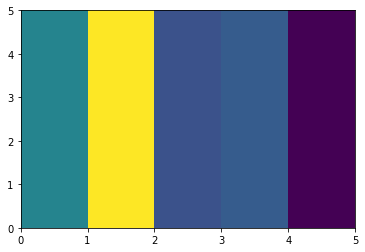

In [13]:
importlib.reload(hu)
'''import os
runNumbers= 1571932015
if not isinstance(runNumbers, list):
        runNumbers = [runNumbers]
run = runNumbers [0]
run = str(run) #but just provide strings, please
if not os.path.exists(run): #if it ain't here, you better provide your own path!
    run = os.path.join("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData", os.path.basename(run) + '.root')
importRun = ROOT.TFile(run, "READ")
RAWdata = importRun.Get("RAWdata")
counter = 0
for event in RAWdata:
    counter +=1
    print(event.QDC0_ch1)
    if counter >6: break'''
hu.calPlot(RAWdata)

In [19]:
def calPlot(runNumbers): #runNumbers accepts various formats: a list or a string, single or full path names
    if not isinstance(runNumbers, list):
        runNumbers = [runNumbers]
    for run in runNumbers:
        run = str(run) #but just provide strings, please
        if not os.path.exists(run): #if it ain't here, you better provide your own path!
            run = os.path.join("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData", os.path.basename(run) + '.ROOT')
        importRun = ROOT.TFile(run, "READ")
        RAWdata = importRun.Get("RAWdata")
        tProf = ROOT.TProfile(os.path.basename(run), "title", 5, 0.5, 5.5)

        #Define the locations of the calorimeters and make a TProfile
        caloPlace={5:1, 1:2, 2:3, 3:4, 4:5}
        print(RAWdata)
        for event in RAWdata:
            for i in [5, 1, 2, 3, 4]:
                value = getattr(event, "QDC0_ch"+str(i))
                if value>200: #Think about the pedestal
                    tProf.Fill(caloPlace[i], value)

        #Normalize the data to a 0-1 range
        data=[]
        for i in range(1, 6):
            data+=[math.log(tProf.GetBinContent(i))]
            print((tProf.GetBinContent(i), math.log(tProf.GetBinContent(i))))
        data=np.interp(data, (np.amin(data), np.max(data)), (0, +1))

        #Create the figure
        plt.figure()
        currentAxis = plt.gca()
        currentAxis.set(xlim=(0, 5), ylim=(0, 5))

        #Make rectangles for each calorimeter
        currentAxis.add_patch(Rectangle((0, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[0]))) #facecolor=col_pal[0]))
        currentAxis.add_patch(Rectangle((1, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[1]))) #facecolor=col_pal[0]))
        currentAxis.add_patch(Rectangle((2, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[2]))) #facecolor=col_pal[0]))
        currentAxis.add_patch(Rectangle((3, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[3]))) #facecolor=col_pal[0]))
        currentAxis.add_patch(Rectangle((4, 0), 1, 5,alpha=1, facecolor=cm.viridis(data[4]))) #facecolor=col_pal[0]))

        print()

In [5]:
import ROOT
importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571950464.root", "READ")
RAWdata=importFile.Get("RAWdata")
isinstance(RAWdata, ROOT.TTree)

True

In [12]:
str(RAWdata).split(':')[1].split(' ')[1].strip()

'RAWdata'

(307.58730158730157, 5.728758954553417)
(431.4196923076923, 6.067081380358056)
(761.3134802973658, 6.635045205100581)
(399.0790159491296, 5.989159432243754)
(215.52146323254945, 5.373060501951133)



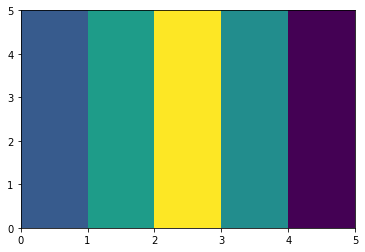

In [14]:
hu.calPlot(1571932015)

In [29]:
import ROOT
importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571950464.root", "READ")
RAWdata=importFile.Get("RAWdata")
print(RAWdata.GetEntries())
print(RAWdata.GetBranch("QDC0_ch2").GetEntry(10))

100186
4


In [35]:
importFile = ROOT.TFile("/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1571932015.root", "READ")
importlib.reload(hu)
RAWdata=importFile.Get("RAWdata")
df2 = hu.dfTree(RAWdata, 100)
print(df2)

    scint  calo_1  calo_2  calo_3  calo_4  calo_0  DWC_0-L  DWC_0-R  \
0    2897     114     996     160     132     124  [12927]  [12234]   
1    3119      90     790     169     140      89  [12927]  [12234]   
2     101     124     200     135     119     110       []       []   
3    3158      78     584     164     130      90  [12927]  [12234]   
4    3087      84     863     131     148      94  [12927]  [12234]   
..    ...     ...     ...     ...     ...     ...      ...      ...   
95   3404      90     674     130     175      80  [12927]  [12234]   
96   3951      96     718     152     163      88  [12927]  [12234]   
97   2873     114     438     137     175      86  [12927]  [12234]   
98   3111      81     758     125     176      80  [12927]  [12234]   
99    116     102     127     125     141      97       []       []   

           DWC_0-U  DWC_0-D  ... [N]MM_1R_hitTDO  \
0   [13489, 25472]  [11720]  ...               1   
1          [13489]  [11720]  ...           